In [1]:
# Import libraries
import time
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.optimizers import SGD

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

from keras.layers import Dense, MaxPool2D, Dropout
from keras.layers import Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.initializers import Constant
from keras.layers.convolutional import Conv2D
import psutil
import tensorflow as tf
import scipy.misc

Using TensorFlow backend.


In [2]:
!nvidia-smi 

Tue Dec  4 20:07:14 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from keras.datasets import mnist, fashion_mnist 

In [4]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#Build and compile neural network

##Architecture 1


In [5]:
# Create model in Keras
# This model is linear stack of layers
clf1 = Sequential()
clf1.add(InputLayer(input_shape=(28,28,1)))
# Normalize the activations of the previous layer at each batch.
#clf1.add(BatchNormalization())
clf1.add(Conv2D(16, (5, 5), activation='relu', padding='same')) 
# Add max pooling layer for 2D data.
clf1.add(MaxPool2D(padding='same'))
clf1.add(Conv2D(32, (5, 5), activation='relu', padding='same')) 
clf1.add(MaxPool2D(padding='same'))
# It is necessary to flatten input data to a vector.
clf1.add(Flatten())
clf1.add(Dense(10,  activation='softmax'))
clf1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
              
clf1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 28,938
Trainable params: 28,938
Non-trainable params: 0
_________________________________________________________________


##Architecture 2

In [6]:
clf2 = Sequential()
clf2.add(InputLayer(input_shape=(28,28,1)))
clf2.add(Conv2D(16, (2, 2), activation='relu', padding='same'))
# Normalize the activations of the previous layer at each batch.
clf2.add(BatchNormalization())
# Add max pooling layer for 2D data.
clf2.add(MaxPool2D(padding='same'))
clf2.add(Conv2D(32, (5, 5), activation='relu', padding='same')) 
# Normalize the activations of the previous layer at each batch.
clf2.add(BatchNormalization())
clf2.add(MaxPool2D(padding='same'))
# It is necessary to flatten input data to a vector.
clf2.add(Flatten())
clf2.add(Dense(10,  activation='softmax'))
clf2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
              
clf2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
__________

##Architecture 3

In [7]:
clf3 = Sequential()
clf3.add(InputLayer(input_shape=(28,28,1)))
clf3.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
clf3.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
clf3.add(BatchNormalization())
clf3.add(MaxPool2D(padding='same'))
clf3.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
clf3.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
clf3.add(BatchNormalization())
clf3.add(MaxPool2D(padding='same'))
clf3.add(Flatten())
clf3.add(Dense(10, activation='softmax')) 

clf3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

clf3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        204864    
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        51232     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        12816     
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 16)        64        
__________

## Architecture 4

In [8]:
# Must define the input shape in the first layer of the neural network
clf4 = Sequential()
clf4.add(InputLayer(input_shape=(28,28,1)))
clf4.add(Conv2D(32, (5, 5), activation='relu', padding='same')) 
# Normalize the activations of the previous layer at each batch.
clf4.add(BatchNormalization())
clf4.add(MaxPooling2D(pool_size=2))
clf4.add(Flatten())
clf4.add(Dropout(0.3))
clf4.add(Dense(10, activation='softmax'))
clf4.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
              
clf4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                62730     
Total params: 63,690
Trainable params: 63,626
Non-trainable params: 64
_________________________________________________________________


##Architecture 5

In [9]:
clf5 = Sequential()
clf5.add(InputLayer(input_shape=(28,28,1)))

#clf5.add(BatchNormalization())
clf5.add(Conv2D(8, (5, 5), activation='relu', padding='same')) 
# Add max pooling layer for 2D data.
clf5.add(MaxPool2D(padding='same'))
# It is necessary to flatten input data to a vector.
clf5.add(Flatten())
clf5.add(Dense(10, activation='softmax'))
clf5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
              
clf5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                15690     
Total params: 15,898
Trainable params: 15,898
Non-trainable params: 0
_________________________________________________________________


# Fashion MNIST

Code heavily borrowed from  https://medium.com/@lukaszlipinski/fashion-mnist-with-keras-in-5-minuts-20ab9eb7b905

https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a

In [10]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


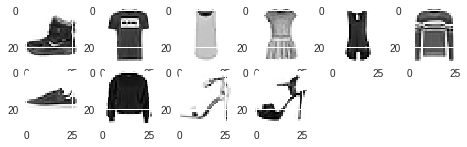

In [11]:
import matplotlib.pyplot as plt
# Show some images from the training dataset
plt.figure()
for i in range(10):
    plt.subplot(5,6,i+1)
    plt.imshow(x_train[i])

In [0]:
# Prepare datasets
# This step contains normalization and reshaping of input.
# For output, it is important to change number to one-hot vector. 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
def go(model = clf1):
    start=time.time()
    mem_before = psutil.virtual_memory()
    cpu_before = psutil.cpu_percent(interval=0.0)
    hist = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_test, y_test))
    end = time.time()
    mem_after = psutil.virtual_memory()
    memory = mem_after.percent - mem_before.percent
    cpu_after = psutil.cpu_percent(interval=0.0)
    cpu_usage = cpu_after - cpu_before
    print('Total Training time: %s' % (end - start))
    print('\n', 'Test accuracy:', model.evaluate(x_test, y_test, verbose=1)[1])
    return {'CPU_use':cpu_usage, 'memory_percent_use':memory}

In [0]:
go()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 326us/step - loss: 0.4581 - acc: 0.8364 - val_loss: 0.3679 - val_acc: 0.8683
Epoch 2/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.3048 - acc: 0.8915 - val_loss: 0.3191 - val_acc: 0.8847
Epoch 3/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.2626 - acc: 0.9049 - val_loss: 0.2968 - val_acc: 0.8938
Epoch 4/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.2368 - acc: 0.9153 - val_loss: 0.2717 - val_acc: 0.9036
Epoch 5/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.2176 - acc: 0.9211 - val_loss: 0.2713 - val_acc: 0.9026
Epoch 6/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.2025 - acc: 0.9258 - val_loss: 0.2630 - val_acc: 0.9063
Epoch 7/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.1877 - acc: 0.9320 - val_loss: 0.

{'CPU_use': 43.10000000000001, 'memory_percent_use': 2.5}

In [0]:
go(clf2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 321us/step - loss: 0.4319 - acc: 0.8504 - val_loss: 0.3536 - val_acc: 0.8805
Epoch 2/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.2986 - acc: 0.8943 - val_loss: 0.3171 - val_acc: 0.8873
Epoch 3/20
60000/60000 [==============================] - 21s 353us/step - loss: 0.2621 - acc: 0.9055 - val_loss: 0.3069 - val_acc: 0.8903
Epoch 4/20
60000/60000 [==============================] - 22s 361us/step - loss: 0.2387 - acc: 0.9141 - val_loss: 0.2824 - val_acc: 0.8958
Epoch 5/20
60000/60000 [==============================] - 21s 344us/step - loss: 0.2200 - acc: 0.9218 - val_loss: 0.2847 - val_acc: 0.8991
Epoch 6/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.2084 - acc: 0.9245 - val_loss: 0.2857 - val_acc: 0.8991
Epoch 7/20
60000/60000 [==============================] - 19s 315us/step - loss: 0.1959 - acc: 0.9288 - val_loss: 0.

{'CPU_use': -0.10000000000000853, 'memory_percent_use': 0.09999999999999964}

In [15]:
go(clf3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 40s 663us/step - loss: 0.4024 - acc: 0.8551 - val_loss: 0.3458 - val_acc: 0.8796
Epoch 2/20
60000/60000 [==============================] - 36s 603us/step - loss: 0.2754 - acc: 0.8997 - val_loss: 0.2978 - val_acc: 0.8936
Epoch 3/20
60000/60000 [==============================] - 36s 602us/step - loss: 0.2366 - acc: 0.9148 - val_loss: 0.2953 - val_acc: 0.8910
Epoch 4/20
60000/60000 [==============================] - 36s 601us/step - loss: 0.2105 - acc: 0.9232 - val_loss: 0.2453 - val_acc: 0.9099
Epoch 5/20
60000/60000 [==============================] - 36s 601us/step - loss: 0.1883 - acc: 0.9322 - val_loss: 0.2394 - val_acc: 0.9167
Epoch 6/20
60000/60000 [==============================] - 36s 600us/step - loss: 0.1682 - acc: 0.9395 - val_loss: 0.2538 - val_acc: 0.9111
Epoch 7/20
60000/60000 [==============================] - 36s 604us/step - loss: 0.1496 - acc: 0.9457 - val_loss: 0.

{'CPU_use': 60.400000000000006, 'memory_percent_use': 4.299999999999999}

In [16]:
go(clf4)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 390us/step - loss: 0.4740 - acc: 0.8364 - val_loss: 0.3474 - val_acc: 0.8770
Epoch 2/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.3365 - acc: 0.8801 - val_loss: 0.3154 - val_acc: 0.8889
Epoch 3/20
60000/60000 [==============================] - 23s 377us/step - loss: 0.3003 - acc: 0.8933 - val_loss: 0.3099 - val_acc: 0.8881
Epoch 4/20
60000/60000 [==============================] - 22s 373us/step - loss: 0.2827 - acc: 0.8977 - val_loss: 0.2836 - val_acc: 0.8977
Epoch 5/20
60000/60000 [==============================] - 23s 381us/step - loss: 0.2618 - acc: 0.9057 - val_loss: 0.3859 - val_acc: 0.8718
Epoch 6/20
60000/60000 [==============================] - 23s 389us/step - loss: 0.2583 - acc: 0.9050 - val_loss: 0.2963 - val_acc: 0.8975
Epoch 7/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.2429 - acc: 0.9111 - val_loss: 0.

{'CPU_use': 9.200000000000003, 'memory_percent_use': 0.09999999999999964}

In [17]:
go(clf5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 355us/step - loss: 0.5035 - acc: 0.8255 - val_loss: 0.4211 - val_acc: 0.8501
Epoch 2/20
60000/60000 [==============================] - 20s 338us/step - loss: 0.3662 - acc: 0.8717 - val_loss: 0.3602 - val_acc: 0.8737
Epoch 3/20
60000/60000 [==============================] - 20s 341us/step - loss: 0.3231 - acc: 0.8868 - val_loss: 0.3407 - val_acc: 0.8811
Epoch 4/20
60000/60000 [==============================] - 21s 343us/step - loss: 0.2954 - acc: 0.8961 - val_loss: 0.3232 - val_acc: 0.8863
Epoch 5/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.2769 - acc: 0.9018 - val_loss: 0.3080 - val_acc: 0.8886
Epoch 6/20
60000/60000 [==============================] - 21s 348us/step - loss: 0.2629 - acc: 0.9066 - val_loss: 0.3122 - val_acc: 0.8870
Epoch 7/20
60000/60000 [==============================] - 21s 346us/step - loss: 0.2529 - acc: 0.9106 - val_loss: 0.

{'CPU_use': 0.9000000000000057, 'memory_percent_use': -0.09999999999999964}

# MNIST

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [19]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


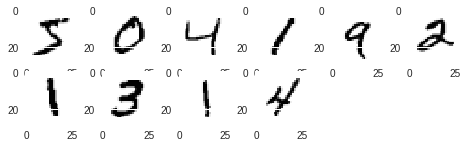

In [20]:
# Show some images from the training dataset
plt.figure()
for i in range(10):
    plt.subplot(5,6,i+1)
    plt.imshow(x_train[i])


In [0]:
# Prepare datasets
# This step contains normalization and reshaping of input.
# For output, it is important to change number to one-hot vector. 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [22]:
go()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 426us/step - loss: 0.1577 - acc: 0.9522 - val_loss: 0.0654 - val_acc: 0.9781
Epoch 2/20
60000/60000 [==============================] - 24s 407us/step - loss: 0.0495 - acc: 0.9845 - val_loss: 0.0366 - val_acc: 0.9867
Epoch 3/20
60000/60000 [==============================] - 24s 408us/step - loss: 0.0360 - acc: 0.9890 - val_loss: 0.0349 - val_acc: 0.9881
Epoch 4/20
60000/60000 [==============================] - 25s 411us/step - loss: 0.0284 - acc: 0.9912 - val_loss: 0.0348 - val_acc: 0.9892
Epoch 5/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.0219 - acc: 0.9929 - val_loss: 0.0319 - val_acc: 0.9904
Epoch 6/20
60000/60000 [==============================] - 25s 409us/step - loss: 0.0176 - acc: 0.9942 - val_loss: 0.0304 - val_acc: 0.9908
Epoch 7/20
60000/60000 [==============================] - 24s 405us/step - loss: 0.0146 - acc: 0.9951 - val_loss: 0.

{'CPU_use': 4.700000000000003, 'memory_percent_use': 0.0}

In [23]:
go(clf2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 28s 467us/step - loss: 0.1430 - acc: 0.9576 - val_loss: 0.0606 - val_acc: 0.9802
Epoch 2/20
60000/60000 [==============================] - 28s 460us/step - loss: 0.0536 - acc: 0.9827 - val_loss: 0.0571 - val_acc: 0.9805
Epoch 3/20
60000/60000 [==============================] - 27s 444us/step - loss: 0.0384 - acc: 0.9876 - val_loss: 0.0405 - val_acc: 0.9855
Epoch 4/20
60000/60000 [==============================] - 27s 444us/step - loss: 0.0288 - acc: 0.9913 - val_loss: 0.0426 - val_acc: 0.9848
Epoch 5/20
60000/60000 [==============================] - 27s 449us/step - loss: 0.0237 - acc: 0.9929 - val_loss: 0.0435 - val_acc: 0.9850
Epoch 6/20
60000/60000 [==============================] - 27s 456us/step - loss: 0.0187 - acc: 0.9943 - val_loss: 0.0404 - val_acc: 0.9874
Epoch 7/20
60000/60000 [==============================] - 27s 447us/step - loss: 0.0154 - acc: 0.9957 - val_loss: 0.

{'CPU_use': -0.5999999999999943, 'memory_percent_use': 0.20000000000000107}

In [24]:
go(clf3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 46s 767us/step - loss: 0.1549 - acc: 0.9616 - val_loss: 0.0450 - val_acc: 0.9858
Epoch 2/20
60000/60000 [==============================] - 46s 761us/step - loss: 0.0355 - acc: 0.9892 - val_loss: 0.0340 - val_acc: 0.9888
Epoch 3/20
60000/60000 [==============================] - 44s 740us/step - loss: 0.0227 - acc: 0.9927 - val_loss: 0.0394 - val_acc: 0.9876
Epoch 4/20
60000/60000 [==============================] - 45s 745us/step - loss: 0.0153 - acc: 0.9949 - val_loss: 0.0322 - val_acc: 0.9895
Epoch 5/20
60000/60000 [==============================] - 44s 739us/step - loss: 0.0110 - acc: 0.9963 - val_loss: 0.0295 - val_acc: 0.9916
Epoch 6/20
60000/60000 [==============================] - 45s 754us/step - loss: 0.0112 - acc: 0.9964 - val_loss: 0.0399 - val_acc: 0.9896
Epoch 7/20
60000/60000 [==============================] - 45s 747us/step - loss: 0.0077 - acc: 0.9975 - val_loss: 0.

{'CPU_use': -2.0, 'memory_percent_use': 0.09999999999999964}

In [25]:
go(clf4)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 340us/step - loss: 0.2196 - acc: 0.9348 - val_loss: 0.0748 - val_acc: 0.9775
Epoch 2/20
60000/60000 [==============================] - 20s 336us/step - loss: 0.0843 - acc: 0.9739 - val_loss: 0.0535 - val_acc: 0.9822
Epoch 3/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.0646 - acc: 0.9798 - val_loss: 0.0509 - val_acc: 0.9827
Epoch 4/20
60000/60000 [==============================] - 20s 338us/step - loss: 0.0537 - acc: 0.9830 - val_loss: 0.0506 - val_acc: 0.9827
Epoch 5/20
60000/60000 [==============================] - 20s 340us/step - loss: 0.0480 - acc: 0.9850 - val_loss: 0.0452 - val_acc: 0.9844
Epoch 6/20
60000/60000 [==============================] - 21s 344us/step - loss: 0.0437 - acc: 0.9856 - val_loss: 0.0418 - val_acc: 0.9852
Epoch 7/20
60000/60000 [==============================] - 20s 338us/step - loss: 0.0391 - acc: 0.9873 - val_loss: 0.

{'CPU_use': 9.299999999999997, 'memory_percent_use': 0.0}

In [26]:
go(clf5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 316us/step - loss: 0.3670 - acc: 0.9053 - val_loss: 0.1340 - val_acc: 0.9603
Epoch 2/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.1121 - acc: 0.9662 - val_loss: 0.0900 - val_acc: 0.9713
Epoch 3/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.0786 - acc: 0.9759 - val_loss: 0.0736 - val_acc: 0.9757
Epoch 4/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.0620 - acc: 0.9811 - val_loss: 0.0638 - val_acc: 0.9798
Epoch 5/20
60000/60000 [==============================] - 19s 311us/step - loss: 0.0516 - acc: 0.9838 - val_loss: 0.0624 - val_acc: 0.9795
Epoch 6/20
60000/60000 [==============================] - 19s 313us/step - loss: 0.0442 - acc: 0.9865 - val_loss: 0.0595 - val_acc: 0.9813
Epoch 7/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.0391 - acc: 0.9880 - val_loss: 0.

{'CPU_use': -1.7999999999999972, 'memory_percent_use': 0.0}

# Breast Cancer Data

code from https://www.kaggle.com/raoulma/cancer-image-tensorflow-cnn-80-valid-acc/notebook

In [27]:
## import data

# load images of shape (5547, 50, 50, 3)
x_images = np.load('/content/gdrive/My Drive/dl_project/X.npy')  

# load labels of shape (5547,1); (0 = no cancer, 1 = cancer)
y_images = np.load('/content/gdrive/My Drive/dl_project/Y.npy')

# shuffle data
perm_array = np.arange(len(x_images))
np.random.shuffle(perm_array)
x_images = x_images[perm_array]
y_images = y_images[perm_array]

print('x_images.shape =', x_images.shape)
print('x_images.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images.min(),
                        x_images.mean(), x_images.std(), x_images.max()))
print('')
print('y_images.shape =', y_images.shape)
print('y_images.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(y_images.min(),
                        y_images.mean(), y_images.std(), y_images.max()))

x_images.shape = (5547, 50, 50, 3)
x_images.min/mean/std/max = 2.00/185.03/47.25/255.00

y_images.shape = (5547,)
y_images.min/mean/std/max = 0.00/0.50/0.50/1.00


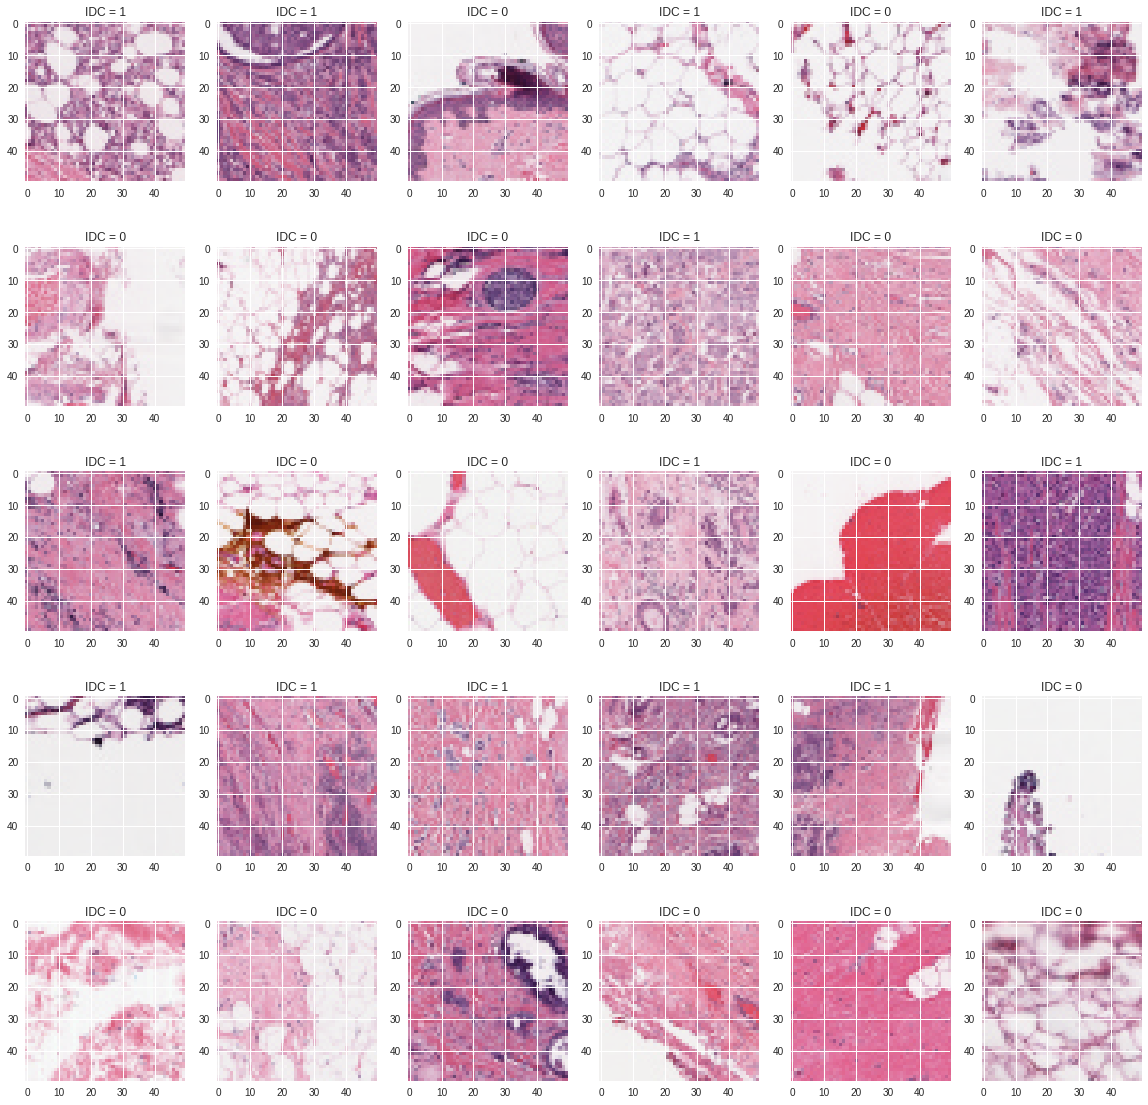

In [28]:
## plot some images  

imgs_0 = x_images[y_images == 0] # 0 = no cancer
imgs_1 = x_images[y_images == 1] # 1 = cancer

plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.title('IDC = %d'%y_images[i])
    plt.imshow(x_images[i])

In [29]:
## normalize data

# convert one-hot encodings into labels
def one_hot_to_dense(labels_one_hot):
    return np.argmax(labels_one_hot,1)

# convert class labels from scalars to one-hot vectors e.g. 1 => [0 1], 0 => [1 0]
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

# function to normalize data
def normalize_data(data): 
    # scale features using statistics that are robust to outliers
    #rs = sklearn.preprocessing.RobustScaler()
    #rs.fit(data)
    #data = rs.transform(data)
    #data = (data-data.mean())/(data.std()) # standardisation
    data = data / data.max() # convert from [0:255] to [0.:1.]
    #data = ((data / 255.)-0.5)*2. # convert from [0:255] to [-1.:+1.]
    return data

# training and validation data
x_train_valid = normalize_data(x_images)

# use one-hot encoding for labels 0,1
y_train_valid = dense_to_one_hot(y_images, 2).astype(np.uint8)

# dictionaries for saving results
y_valid_pred = {}
y_train_pred = {}
y_test_pred = {}
train_loss, valid_loss = {}, {}
train_acc, valid_acc = {}, {}
cnf_valid_matrix = {}

print('x_train_valid.shape =', x_train_valid.shape)
print('x_train_valid.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_train_valid.min(),
                        x_train_valid.mean(), x_train_valid.std(), x_train_valid.max()))
print('')
print('y_train_valid.shape =', y_train_valid.shape)
print('y_train_valid.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(y_train_valid.min(),
                        y_train_valid.mean(), y_train_valid.std(), y_train_valid.max()))

x_train_valid.shape = (5547, 50, 50, 3)
x_train_valid.min/mean/std/max = 0.01/0.73/0.19/1.00

y_train_valid.shape = (5547, 2)
y_train_valid.min/mean/std/max = 0.00/0.50/0.50/1.00


In [0]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=2)

#Revise compile neural network

##Architecture 1


In [31]:
# Create model in Keras
# This model is linear stack of layers
model = Sequential()
model.add(InputLayer(input_shape=(50,50,3)))
# Normalize the activations of the previous layer at each batch.
#clf1.add(BatchNormalization())
model.add(Conv2D(16, (5, 5), activation='relu', padding='same')) 
# Add max pooling layer for 2D data.
model.add(MaxPool2D(padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same')) 
model.add(MaxPool2D(padding='same'))
# It is necessary to flatten input data to a vector.
model.add(Flatten())
model.add(Dense(2,  activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
              
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 50, 50, 16)        1216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 25, 25, 32)        12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 10818     
Total params: 24,866
Trainable params: 24,866
Non-trainable params: 0
_________________________________________________________________


##Architecture 2

In [32]:
model2 = Sequential()
model2.add(InputLayer(input_shape=(50,50,3)))
model2.add(Conv2D(16, (2, 2), activation='relu', padding='same'))
# Normalize the activations of the previous layer at each batch.
model2.add(BatchNormalization())
# Add max pooling layer for 2D data.
model2.add(MaxPool2D(padding='same'))
model2.add(Conv2D(32, (5, 5), activation='relu', padding='same')) 
# Normalize the activations of the previous layer at each batch.
model2.add(BatchNormalization())
model2.add(MaxPool2D(padding='same'))
# It is necessary to flatten input data to a vector.
model2.add(Flatten())
model2.add(Dense(2,  activation='softmax'))
model2.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
              
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 50, 50, 16)        208       
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 50, 16)        64        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 32)        12832     
_________________________________________________________________
batch_normalization_7 (Batch (None, 25, 25, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
__________

##Architecture 3

In [33]:
model3 = Sequential()
model3.add(InputLayer(input_shape=(50,50,3)))
model3.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model3.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(padding='same'))
model3.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model3.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(padding='same'))
model3.add(Flatten())
model3.add(Dense(2, activation='softmax')) 

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 50, 50, 128)       9728      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 50, 50, 64)        204864    
_________________________________________________________________
batch_normalization_8 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 32)        51232     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 25, 25, 16)        12816     
_________________________________________________________________
batch_normalization_9 (Batch (None, 25, 25, 16)        64        
__________

## Architecture 4

In [34]:
# Must define the input shape in the first layer of the neural network
model4 = Sequential()
model4.add(InputLayer(input_shape=(50,50,3)))
model4.add(Conv2D(32, (5, 5), activation='relu', padding='same')) 
# Normalize the activations of the previous layer at each batch.
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dropout(0.3))
model4.add(Dense(2, activation='softmax'))
model4.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
              
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 50, 50, 32)        2432      
_________________________________________________________________
batch_normalization_10 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 20000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 40002     
Total params: 42,562
Trainable params: 42,498
Non-trainable params: 64
_________________________________________________________________


##Architecture 5

In [35]:
model5 = Sequential()
model5.add(InputLayer(input_shape=(50,50,3)))

#clf5.add(BatchNormalization())
model5.add(Conv2D(8, (5, 5), activation='relu', padding='same')) 
# Add max pooling layer for 2D data.
model5.add(MaxPool2D(padding='same'))
# It is necessary to flatten input data to a vector.
model5.add(Flatten())
model5.add(Dense(2, activation='softmax'))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
              
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 50, 50, 8)         608       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 8)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 10002     
Total params: 10,610
Trainable params: 10,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
go(model)

Train on 4437 samples, validate on 1110 samples
Epoch 1/20
4437/4437 [==============================] - 4s 792us/step - loss: 0.6252 - acc: 0.6423 - val_loss: 0.5285 - val_acc: 0.7667
Epoch 2/20
4437/4437 [==============================] - 2s 491us/step - loss: 0.5514 - acc: 0.7255 - val_loss: 0.5223 - val_acc: 0.7622
Epoch 3/20
4437/4437 [==============================] - 2s 494us/step - loss: 0.5527 - acc: 0.7318 - val_loss: 0.5687 - val_acc: 0.7018
Epoch 4/20
4437/4437 [==============================] - 2s 475us/step - loss: 0.5491 - acc: 0.7368 - val_loss: 0.5046 - val_acc: 0.7676
Epoch 5/20
4437/4437 [==============================] - 2s 477us/step - loss: 0.5443 - acc: 0.7332 - val_loss: 0.5509 - val_acc: 0.7180
Epoch 6/20
4437/4437 [==============================] - 2s 480us/step - loss: 0.5555 - acc: 0.7262 - val_loss: 0.4971 - val_acc: 0.7766
Epoch 7/20
4437/4437 [==============================] - 2s 497us/step - loss: 0.5297 - acc: 0.7467 - val_loss: 0.5047 - val_acc: 0.7829


{'CPU_use': 2.8000000000000114, 'memory_percent_use': -0.09999999999999964}

In [37]:
go(model2)

Train on 4437 samples, validate on 1110 samples
Epoch 1/20
4437/4437 [==============================] - 3s 774us/step - loss: 5.4213 - acc: 0.5740 - val_loss: 7.6836 - val_acc: 0.4982
Epoch 2/20
4437/4437 [==============================] - 2s 531us/step - loss: 1.4617 - acc: 0.6960 - val_loss: 2.1881 - val_acc: 0.5802
Epoch 3/20
4437/4437 [==============================] - 2s 522us/step - loss: 1.0936 - acc: 0.7138 - val_loss: 0.9592 - val_acc: 0.5423
Epoch 4/20
4437/4437 [==============================] - 2s 552us/step - loss: 0.7893 - acc: 0.7363 - val_loss: 3.1080 - val_acc: 0.5009
Epoch 5/20
4437/4437 [==============================] - 2s 533us/step - loss: 0.6974 - acc: 0.7446 - val_loss: 1.1178 - val_acc: 0.7162
Epoch 6/20
4437/4437 [==============================] - 2s 542us/step - loss: 0.6201 - acc: 0.7566 - val_loss: 1.1093 - val_acc: 0.5703
Epoch 7/20
4437/4437 [==============================] - 3s 569us/step - loss: 0.5369 - acc: 0.7816 - val_loss: 0.6276 - val_acc: 0.7090


{'CPU_use': 1.2999999999999972, 'memory_percent_use': 0.0}

In [38]:
go(model3)

Train on 4437 samples, validate on 1110 samples
Epoch 1/20
4437/4437 [==============================] - 10s 2ms/step - loss: 0.6728 - acc: 0.7113 - val_loss: 0.5314 - val_acc: 0.7937
Epoch 2/20
4437/4437 [==============================] - 7s 2ms/step - loss: 0.5751 - acc: 0.7365 - val_loss: 0.9193 - val_acc: 0.6685
Epoch 3/20
4437/4437 [==============================] - 7s 2ms/step - loss: 0.5571 - acc: 0.7476 - val_loss: 4.1853 - val_acc: 0.5135
Epoch 4/20
4437/4437 [==============================] - 7s 2ms/step - loss: 0.5618 - acc: 0.7419 - val_loss: 1.7438 - val_acc: 0.5126
Epoch 5/20
4437/4437 [==============================] - 7s 2ms/step - loss: 0.5581 - acc: 0.7410 - val_loss: 0.6221 - val_acc: 0.7685
Epoch 6/20
4437/4437 [==============================] - 7s 2ms/step - loss: 0.5449 - acc: 0.7503 - val_loss: 0.6325 - val_acc: 0.7036
Epoch 7/20
4437/4437 [==============================] - 7s 2ms/step - loss: 0.5063 - acc: 0.7719 - val_loss: 0.5907 - val_acc: 0.7640
Epoch 8/20
44

{'CPU_use': -2.1999999999999886, 'memory_percent_use': 0.1999999999999993}

In [39]:
go(model4)

Train on 4437 samples, validate on 1110 samples
Epoch 1/20
4437/4437 [==============================] - 3s 779us/step - loss: 3.0021 - acc: 0.6482 - val_loss: 1.5307 - val_acc: 0.6468
Epoch 2/20
4437/4437 [==============================] - 2s 498us/step - loss: 1.0824 - acc: 0.6779 - val_loss: 0.7741 - val_acc: 0.6694
Epoch 3/20
4437/4437 [==============================] - 2s 519us/step - loss: 0.6395 - acc: 0.7129 - val_loss: 0.6174 - val_acc: 0.7468
Epoch 4/20
4437/4437 [==============================] - 2s 527us/step - loss: 0.5818 - acc: 0.7257 - val_loss: 0.6638 - val_acc: 0.7306
Epoch 5/20
4437/4437 [==============================] - 2s 519us/step - loss: 0.5203 - acc: 0.7604 - val_loss: 0.5849 - val_acc: 0.7153
Epoch 6/20
4437/4437 [==============================] - 2s 523us/step - loss: 0.4950 - acc: 0.7735 - val_loss: 0.8599 - val_acc: 0.6171
Epoch 7/20
4437/4437 [==============================] - 2s 513us/step - loss: 0.4772 - acc: 0.7803 - val_loss: 0.6001 - val_acc: 0.7180


{'CPU_use': 12.700000000000003, 'memory_percent_use': 0.0}

In [40]:
go(model5)

Train on 4437 samples, validate on 1110 samples
Epoch 1/20
4437/4437 [==============================] - 3s 733us/step - loss: 0.6483 - acc: 0.6250 - val_loss: 0.5961 - val_acc: 0.6694
Epoch 2/20
4437/4437 [==============================] - 2s 425us/step - loss: 0.5974 - acc: 0.6863 - val_loss: 0.5294 - val_acc: 0.7685
Epoch 3/20
4437/4437 [==============================] - 2s 419us/step - loss: 0.5514 - acc: 0.7352 - val_loss: 0.5794 - val_acc: 0.7045
Epoch 4/20
4437/4437 [==============================] - 2s 434us/step - loss: 0.5356 - acc: 0.7410 - val_loss: 0.5575 - val_acc: 0.7081
Epoch 5/20
4437/4437 [==============================] - 2s 428us/step - loss: 0.5360 - acc: 0.7379 - val_loss: 0.5494 - val_acc: 0.7207
Epoch 6/20
4437/4437 [==============================] - 2s 422us/step - loss: 0.5222 - acc: 0.7532 - val_loss: 0.5627 - val_acc: 0.7072
Epoch 7/20
4437/4437 [==============================] - 2s 423us/step - loss: 0.5080 - acc: 0.7548 - val_loss: 0.4928 - val_acc: 0.7829


{'CPU_use': 3.200000000000003, 'memory_percent_use': 0.10000000000000142}